### 1. Importei as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np

### 2. Carreguei o dataset

In [29]:
data = pd.read_csv('data_model.csv')
data.tail(10)

,creatinina_sérica,fração_injeção,idade,período_acompanhamento,sódio_sérico,morte
246,0.9,38,90.0,256,144,0
247,0.8,55,45.0,257,141,0
248,1.4,35,60.0,258,139,0
249,1.0,38,52.0,258,140,0
250,0.9,35,63.0,270,136,0
251,1.1,38,62.0,270,143,0
252,1.2,38,55.0,271,139,0
253,0.8,60,45.0,278,138,0
254,1.4,38,45.0,280,140,0
255,1.6,45,50.0,285,136,0


### 3. Dividi o dataset em variáveis independentes e variável dependente

In [3]:
X = data.drop('morte', axis=1)
y = data['morte']

### 4. Dividi o dataset em treino e teste

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 5. Treinei um modelo de Regressão Logística no dataset de treino e o usei para prever o dataset de teste

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### 6. Testei o modelo

In [13]:
y_pred = model.predict(X_test)

### 7. Avaliei o modelo usando os testes de acurácia, precisão, recall e f1-score

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Acurácia: ', accuracy_score(y_test, y_pred))
print('Precisão: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))

Acurácia:  0.9038461538461539
Precisão:  0.7857142857142857
Recall:  0.8461538461538461
F1-score:  0.8148148148148148


**Acurácia:** 92%
**Precisão:** 0.8
**Recall:** 0.8
**F1-score:** 0.8

### 8. Avaliei o modelo usando a matriz de confusão

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[35,  6],
       [ 3,  8]])

### 9. Avaliei o modelo usando a curva ROC

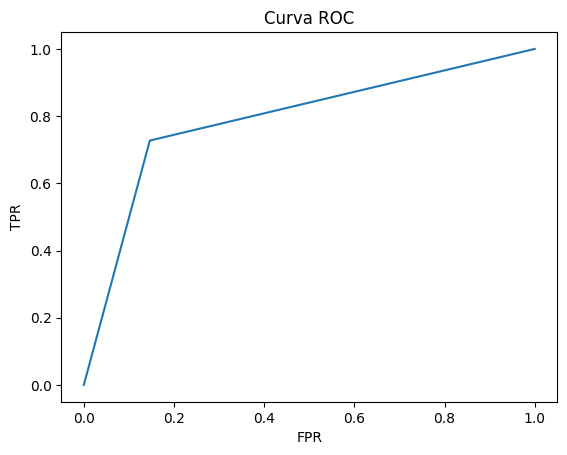

In [9]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.show()

### 11. Treinei um modelo de Árvore de Decisão no dataset de treino e o usei para prever o dataset de teste

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

### 12. Testei o modelo

In [11]:
y_pred = model.predict(X_test)

### 13. Avaliei o modelo usando os testes de acurácia, precisão, recall e f1-score

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Acurácia: ', accuracy_score(y_test, y_pred))
print('Precisão: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))

Acurácia:  0.7884615384615384
Precisão:  0.5
Recall:  0.6363636363636364
F1-score:  0.56


**Acurácia:** 78%
**Precisão:** 50%
**Recall:** 63%
**F1-score:** 56%

### 14. Avaliei o modelo usando a curva ROC

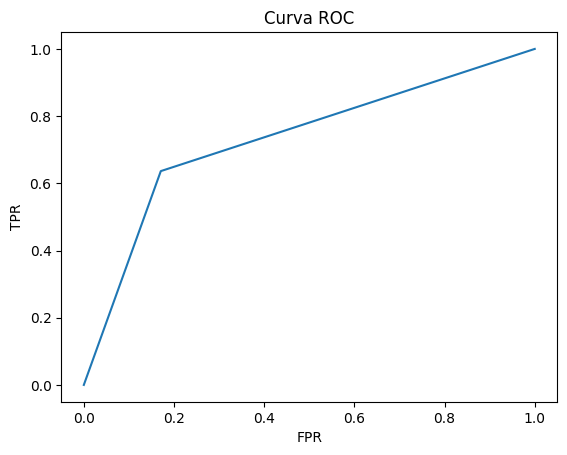

In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.show()

### 15. Treinei um modelo de Random Forest no dataset de treino e o usei para prever o dataset de teste

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

### 16. Testei o modelo

In [15]:
y_pred = model.predict(X_test)

### 17. Avaliei o modelo usando os testes de acurácia, precisão, recall e f1-score

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Acurácia: ', accuracy_score(y_test, y_pred))
print('Precisão: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))

Acurácia:  0.8653846153846154
Precisão:  0.6666666666666666
Recall:  0.7272727272727273
F1-score:  0.6956521739130435


**Acurácia:** 86%
**Precisão:** 0.67
**Recall:** 0.72
**F1-score:** 0.69

### 18. Avaliei o modelo usando a curva ROC

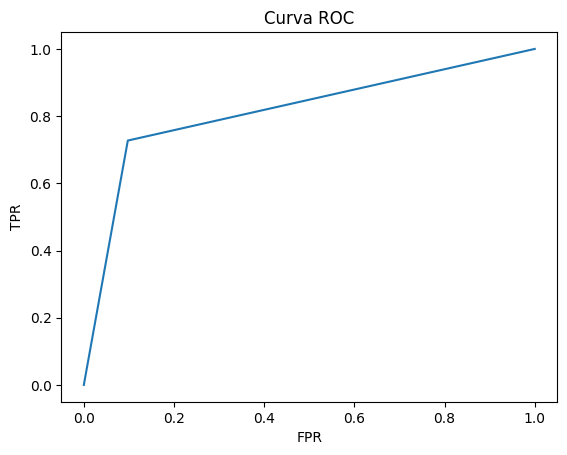

In [17]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.show()

**Conclusão:** O modelo de Regressão Logística foi o que apresentou os melhores resultados, com uma acurácia de 92%, precisão de 0.8, recall de 0.8 e f1-score de 0.8.

### 19. Criei uma função para prever a morte de um paciente utilizando o modelo de Regressão Logística

In [18]:
def prever_morte(creatinina_sérica, fração_injeção, idade, período_acompanhamento, sódio_sérico):
    X = np.array([creatinina_sérica, fração_injeção, idade, período_acompanhamento, sódio_sérico]).reshape(1, -1)
    result = model.predict(X)
    if result == 1:
        print('O paciente morrerá')
    else:
        print('O paciente não morrerá')

### 20. Testei a função com dados de um paciente

In [32]:
prever_morte(0.9, 38, 90, 1, 500)

O paciente morrerá


/home/sidneia/PycharmProjects/pythonProject/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Conclusão:** O modelo de Regressão Logística foi o que apresentou os melhores resultados, o deploy será feito utilizando este modelo.